In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [8]:
mnist = input_data.read_data_sets('/tmp/data/', one_hot=True)

learning_rate = 0.01
num_steps = 30000
batch_size = 256

display_step = 1000
examples_to_show = 10

#Network parameters
num_hidden_1 = 256
num_hidden_2 = 128
num_input = 784

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [0]:
X = tf.placeholder(dtype=tf.float32, shape=[None, num_input])

weights = {
    'encoder1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder2': tf.Variable(tf.random_normal([num_hidden_1, num_input]))
}

biases = {
    'encoder1': tf.Variable(tf.zeros([num_hidden_1])),
    'encoder2': tf.Variable(tf.zeros([num_hidden_2])),
    'decoder1': tf.Variable(tf.zeros([num_hidden_1])),
    'decoder2': tf.Variable(tf.zeros([num_input]))
}


Step 1000: Minibatch Loss: 0.146424
Step 2000: Minibatch Loss: 0.122662
Step 3000: Minibatch Loss: 0.118335
Step 4000: Minibatch Loss: 0.114353
Step 5000: Minibatch Loss: 0.106769
Step 6000: Minibatch Loss: 0.104885
Step 7000: Minibatch Loss: 0.100261
Step 8000: Minibatch Loss: 0.096036
Step 9000: Minibatch Loss: 0.092812
Step 10000: Minibatch Loss: 0.091025
Step 11000: Minibatch Loss: 0.088827
Step 12000: Minibatch Loss: 0.085801
Step 13000: Minibatch Loss: 0.084802
Step 14000: Minibatch Loss: 0.084828
Step 15000: Minibatch Loss: 0.083474
Step 16000: Minibatch Loss: 0.083241
Step 17000: Minibatch Loss: 0.084138
Step 18000: Minibatch Loss: 0.080940
Step 19000: Minibatch Loss: 0.081992
Step 20000: Minibatch Loss: 0.080819
Step 21000: Minibatch Loss: 0.078214
Step 22000: Minibatch Loss: 0.072269
Step 23000: Minibatch Loss: 0.073337
Step 24000: Minibatch Loss: 0.073431
Step 25000: Minibatch Loss: 0.072152
Step 26000: Minibatch Loss: 0.069343
Step 27000: Minibatch Loss: 0.066584
Step 28000

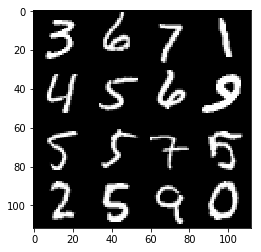

Reconstructed Images


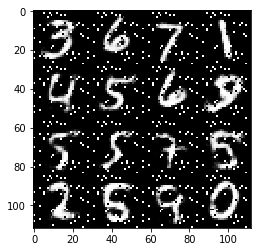

In [10]:
def encoder(x):  
  #layer1 = sigmoid(x*w + b)
  layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder1']), biases['encoder1']))
  #layer2 = sigmoid(layer1*w + b)
  layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder2']), biases['encoder2']))

  return layer_2

def decoder(x):
  #layer1 = sigmoid(x*w + b)
  layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder1']), biases['decoder1']))
  #layer2 = sigmoid(layer1*w + b)
  layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder2']), biases['decoder2']))

  return layer_2

encoder_op = encoder(X)
decoder_op = decoder(encoder_op)
y_pred = decoder_op

y = X

loss = tf.reduce_mean(tf.pow(y_pred-y, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  for i in range(1, num_steps+1):
    train_x,_ = mnist.train.next_batch(batch_size=batch_size)
    _, l = sess.run([optimizer, loss], feed_dict={X: train_x})

    if i%display_step==0:
      print('Step %i: Minibatch Loss: %f' % (i, l))

  #testing
  #encode ad decode images from test set and visualize their reconstructions
  n = 4
  canvas_orig = np.empty((28*n, 28*n))
  canvas_recon = np.empty((28*n, 28*n))

  for i in range(n):
    batch_x, _ = mnist.test.next_batch(n)
    g = sess.run(decoder_op, feed_dict={X: batch_x})

    for j in range(n):
      canvas_orig[i*28:(i+1)*28, j*28:(j+1)*28] = \
      batch_x[j].reshape([28, 28])

    for j in range(n):
      canvas_recon[i*28:(i+1)*28, j*28:(j+1)*28] = \
      g[j].reshape([28, 28])
  
  print('Original Images')
  plt.figure(figsize=(n, n))
  plt.imshow(canvas_orig, origin='upper', cmap='gray')
  plt.show()

  print('Reconstructed Images')
  plt.figure(figsize=(n, n))
  plt.imshow(canvas_recon, origin='upper', cmap='gray')
  plt.show()


In [0]:
from PIL import Image

im = Image.open('/111.png')
im = im.convert('1')
data = im.getdata()
data = np.matrix(data)

print()